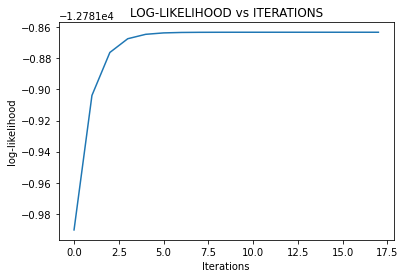

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
dataframe=pd.read_csv('A2Q1.csv',header=None)
data_array=dataframe.to_numpy()
pi=np.zeros(shape=(4))
p=np.zeros(shape=[4])
z=np.zeros(shape=[400,1])
num_ones = data_array.sum(axis = 1)
error=[]
c=0
s=0
for i in range(0,400):
    z[i]=random.randint(0,3)
mean_array=np.zeros(shape=[4,50])
def points(x):
    c=0
    for i in x:
        if(i==1):
            c+=1
    return c
def cluster_points(k):
    points=0
    for i in range(0,400):
        if(z[i]==k):
            points=points+1
    return points
def calc_clustermean(k):
    sum_z=np.zeros(shape=[1,50])
    c=0
    for i in range(0,400):
        if(z[i]==k):
            sum_z=sum_z+data_array[i]
            c=c+1
    z_mean=sum_z/c
    return z_mean
def calc_prob(mean_array):
    s=0
    for i in mean_array:
        s=s+i
    return s/50;
# print(p)
mle1=[]
for x in range(100):
    lmda=np.zeros(shape=[400,4])
    mean_array[0]=calc_clustermean(0)
    mean_array[1]=calc_clustermean(1)
    mean_array[2]=calc_clustermean(2)
    mean_array[3]=calc_clustermean(3)
    p[0]=calc_prob(mean_array[0])
    p[1]=calc_prob(mean_array[1])
    p[2]=calc_prob(mean_array[2])
    p[3]=calc_prob(mean_array[3])
    pi[0]=cluster_points(0)/400
    pi[1]=cluster_points(1)/400
    pi[2]=cluster_points(2)/400
    pi[3]=cluster_points(3)/400
    #calculate sigma 1 2 3 4
    #calculate lamda pi mnw and sigma
    #find pi mean and sigma using lamda
    #comapare new pi sigma mean with old<0.00001 converge else repeat
    j=0
    mle=[]
    ##Re-initializing clusters
    for i in range(0,400):
        z[i]=random.randint(0,3)
    change=True
    while change:
        pi_prev=pi.copy()
        p_prev=p.copy()
        # print(p)
        for i1 in range(400):
            for k in range(4):
                num=pi[k]*(p[k]**num_ones[i1])*((1-p[k])**(50-num_ones[i1])) #num_ones[i1]
                tot_prob=0
                for l in range(4):
                    tot_prob+=pi[l]*(p[l]**(num_ones[i1]))*((1-p[l])**(50-num_ones[i1]))
                lmda[i1][k]=num/tot_prob
        s22=0
        s11=0
        for k2 in range(4):
            for i2 in range(400):
                s11+=lmda[i2][k2]
                s22+=lmda[i2][k2]*num_ones[i2]/50
            pi[k2]=s11/400
            p[k2]=s22/s11
            s11=0
            s22=0    
        pi_error=np.linalg.norm(pi-pi_prev)
        p_error=np.linalg.norm(p-p_prev)
        ##calculate maximum likelihood
        osum=0
        for i3 in range(400):
            isum=0
            for k in range(4):
                isum+=pi[k]*(p[k]**num_ones[i3])*((1-p[k])**(50-num_ones[i3]))
            osum+=math.log(isum)
        mle.append(osum)
        if(pi_error<=0.000001 and p_error<=0.000001):
            change=False

        # print(np.sum(pi))
        # print(np.sum(p))
    mle1.append(mle)
max_size=0
for lis in mle1:
    m=len(lis)
    if(m>max_size):
        max_size=m
for lis in mle1:
    len_li=len(lis)
    while(len_li!=max_size):
        lis.append(lis[len_li-1])
        len_li+=1
    len_li=0
lis_arr=np.array(mle1)
# print(np.sum(lis_arr,axis=0)/100)
mle_avg=np.sum(lis_arr,axis=0)/100
plt.ylabel("log-likelihood")
plt.xlabel("Iterations")
plt.title("LOG-LIKELIHOOD vs ITERATIONS")
plt.show(plt.plot(mle_avg))